In [70]:
import pandas as pd
df = pd.read_csv('mushrooms.csv')
df.head()

# ustawiamy zmienną celu - 1 dla trujących, 0 dla jadalnych
df['class'][df['class'] == 'p'] = 1
df['class'][df['class'] == 'e'] = 0
df.shape



In [61]:
# przygotowanie próby uczącej i testowej
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# sprawdzenie wymiarowości
# print(y.shape)
# print(x.shape)
# print(y)
# print(x)

# kodowanie zmiennych 'caterogical' za pomocą OneHotEncoder
# print(type(x))
# print(x)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(x)
x = enc.transform(x)
# print(x)
# print(type(x)) # widzimy, że x stał się sparse matrix

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)



#podział na zbiór uczacy, trenujacy
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)





(6093, 117)
(6093,)
(2031, 117)
(2031,)


              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1055
           1       0.97      1.00      0.99       976

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



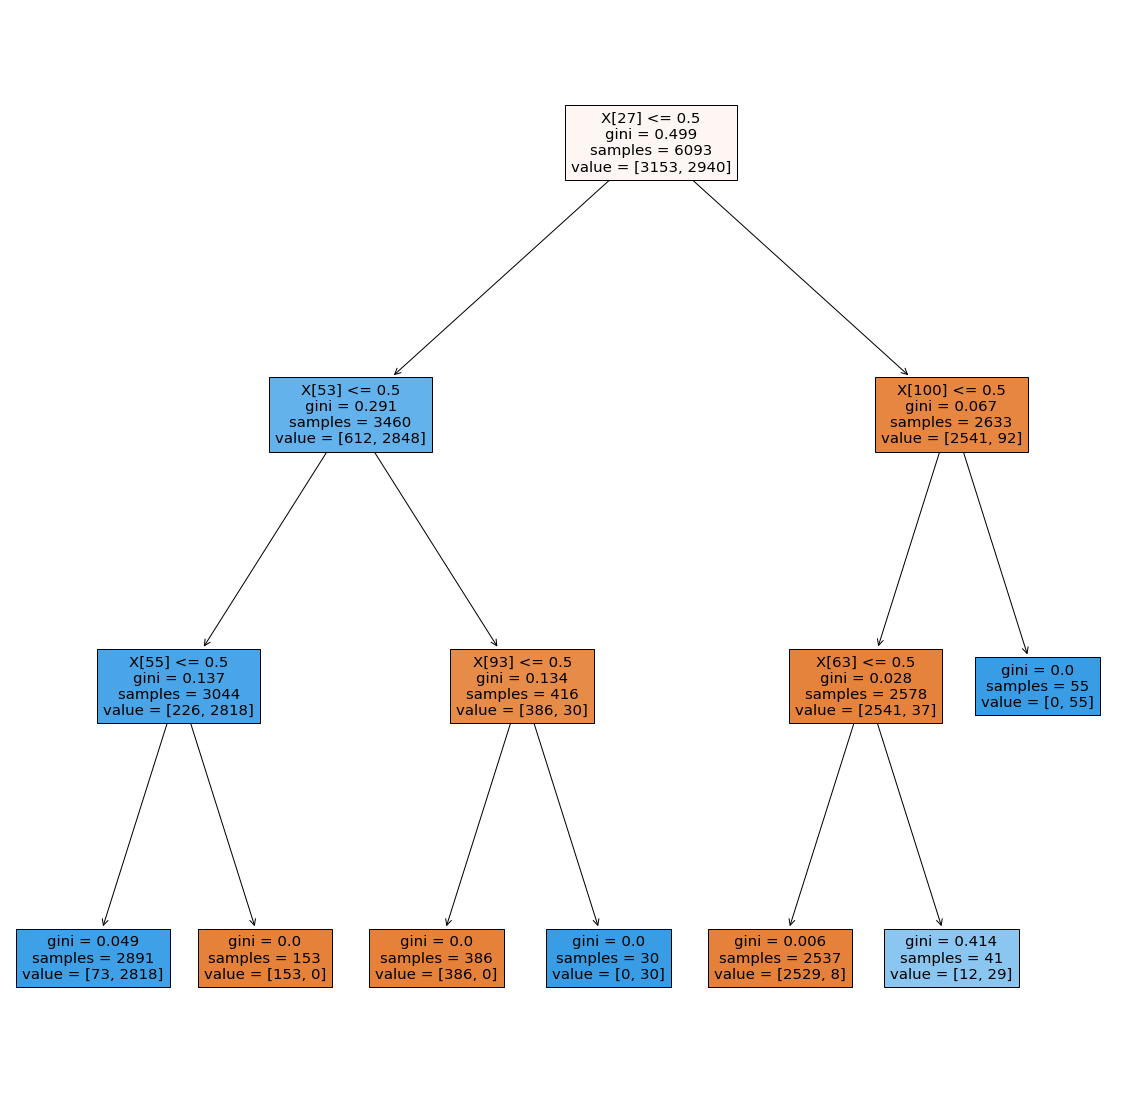

2940


In [64]:
# trenowanie klasyfikatora na próbie uczącej
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
# classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
classifier.fit(x_train, y_train);


#predykcja na zbiorze testowym
y_pred = classifier.predict(x_test)

# raport z klasyfikacji
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,20))
plot_tree(classifier,  filled=True)
plt.show()

import numpy as np
print(np.sum(y_train))



In [66]:
feature_names = enc.get_feature_names()
print(feature_names[27])
print(feature_names[53])
print(feature_names[100])
for ind in [4,10,19]:
    print(df.columns[ind + 1])


x4_n
x10_c
x19_r
odor
stalk-root
spore-print-color


In [67]:
# klasafikacja nowego przykładu
# s = 's;y;y;f;n;f;c;n;k;e;c;s;s;w;w;p;w;o;p;n;n;u'
# "', '".join(s.split(';'))
col_names = ['s', 'y', 'y', 'f', 'n', 'f', 'c', 'n', 'k', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'u']
x_new = np.array(col_names).reshape(1, len(col_names))
x_new = enc.transform(x_new)
y = classifier.predict(x_new)
print(col_names[4])
print(y)


n
[0]
